<a href="https://colab.research.google.com/github/Anreen28/cardiovascular-risk-factor/blob/main/proj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **CHD**

### IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import sklearn as sk

In [ ]:
df = pd.read_csv('data_cardiovascular_risk.csv')
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Filtering Dataset

In [ ]:
#df = df.drop(['education'], axis=1)
df = df.drop(['id'], axis=1)

In [ ]:
df.shape

(3390, 16)

In [ ]:
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
import missingno as msno

<function matplotlib.pyplot.show(close=None, block=None)>

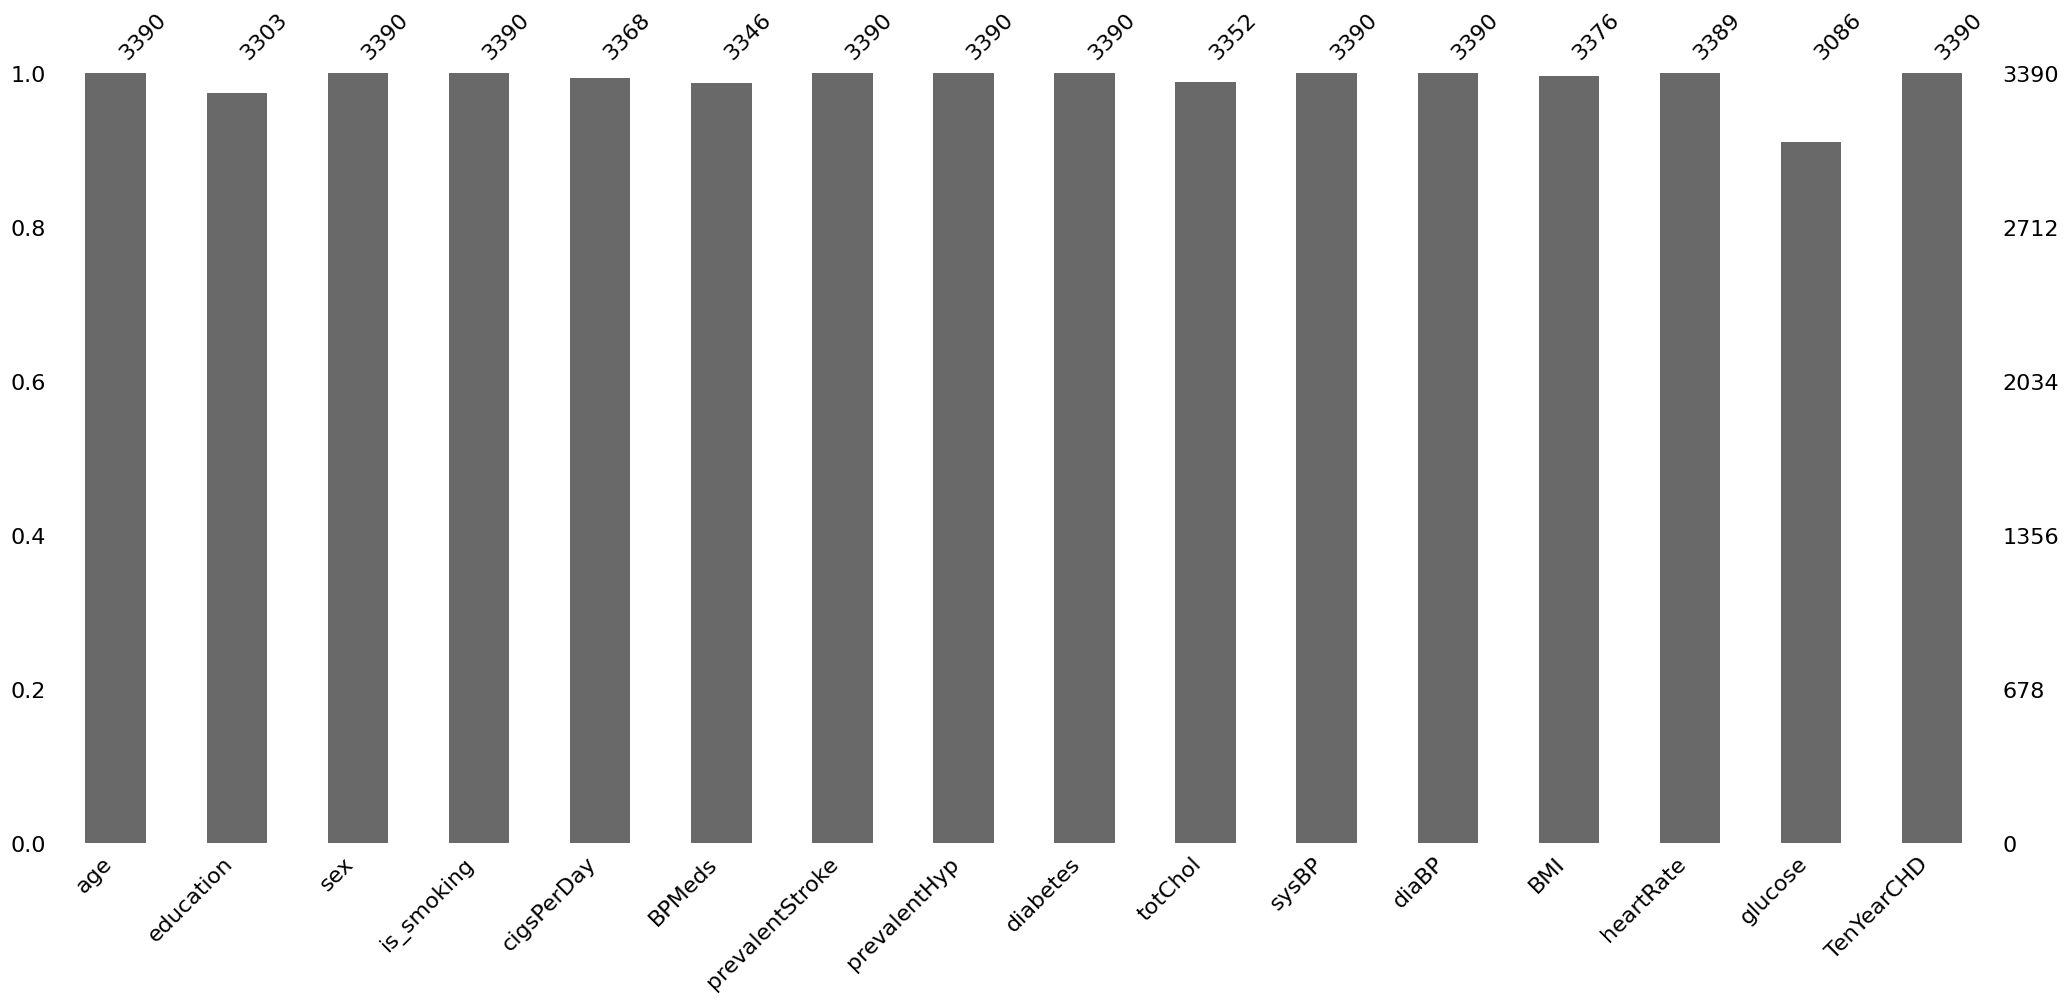

In [ ]:
msno.bar(df)
plt.show

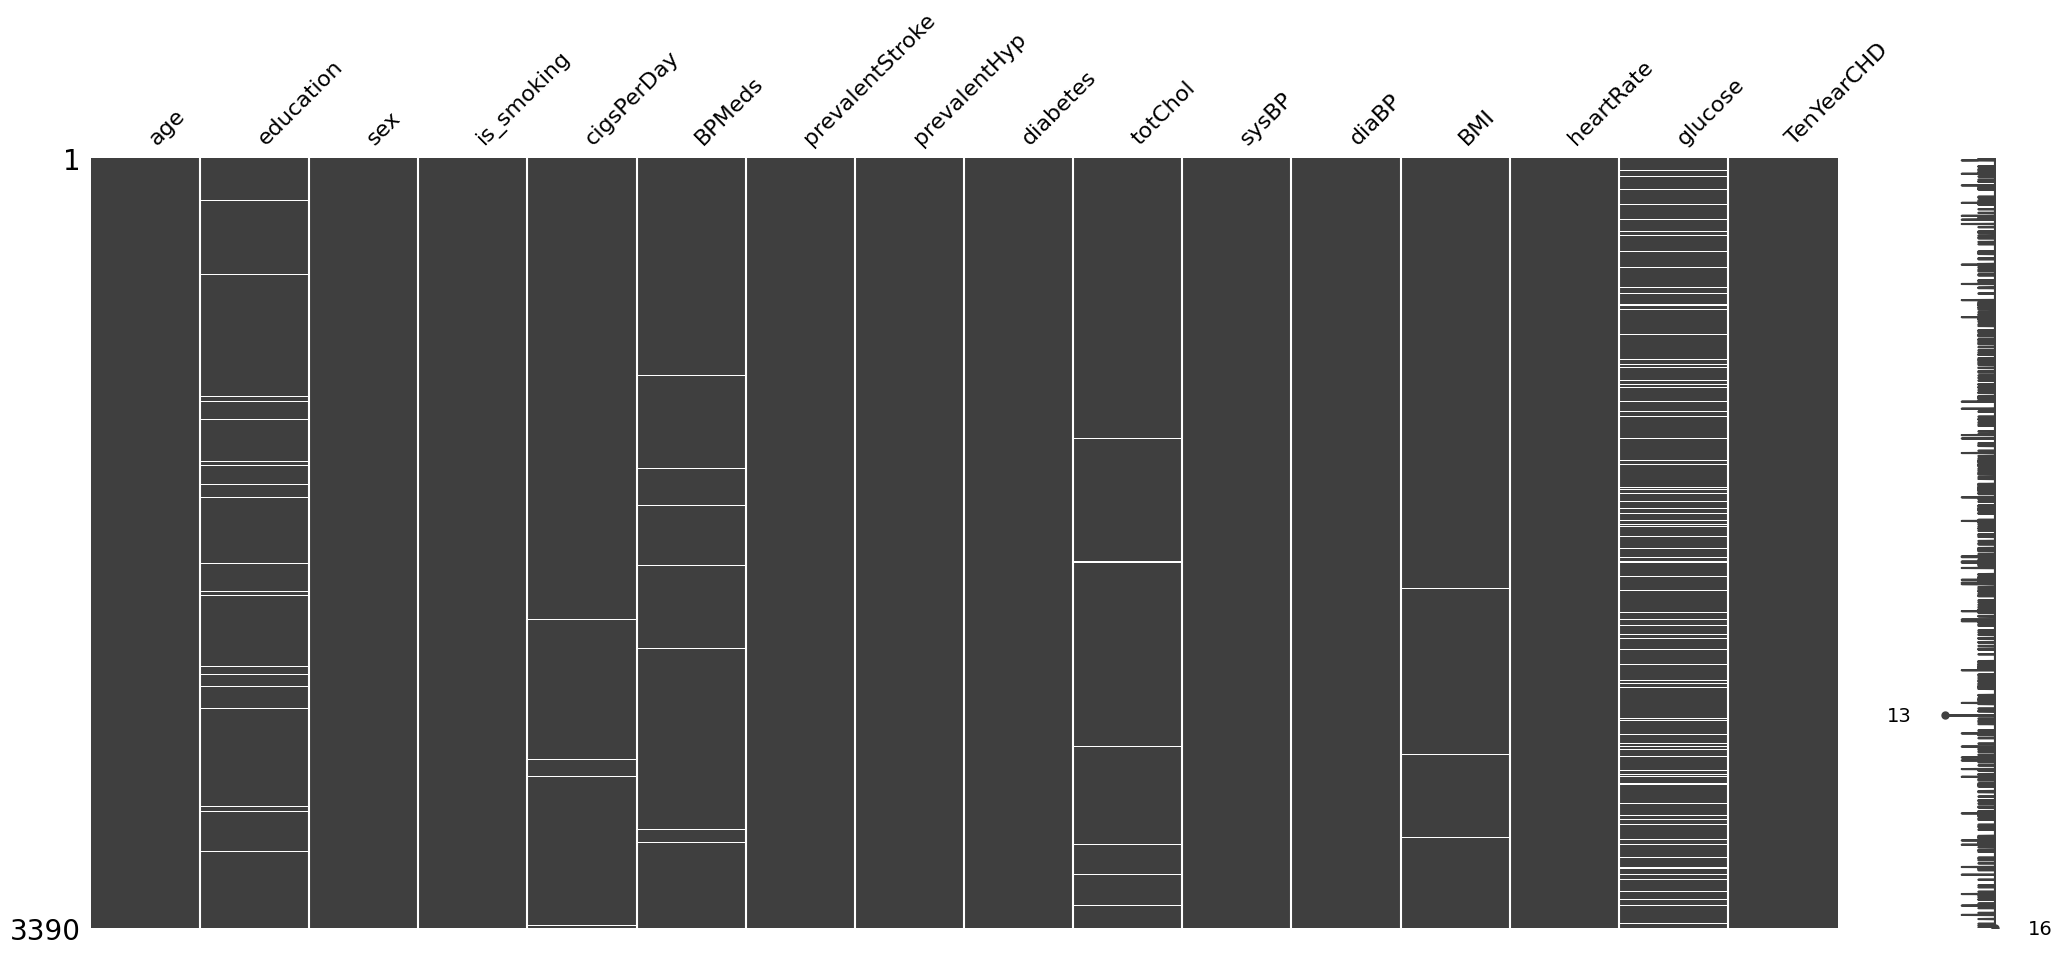

In [ ]:
msno.matrix(df)
plt.show()

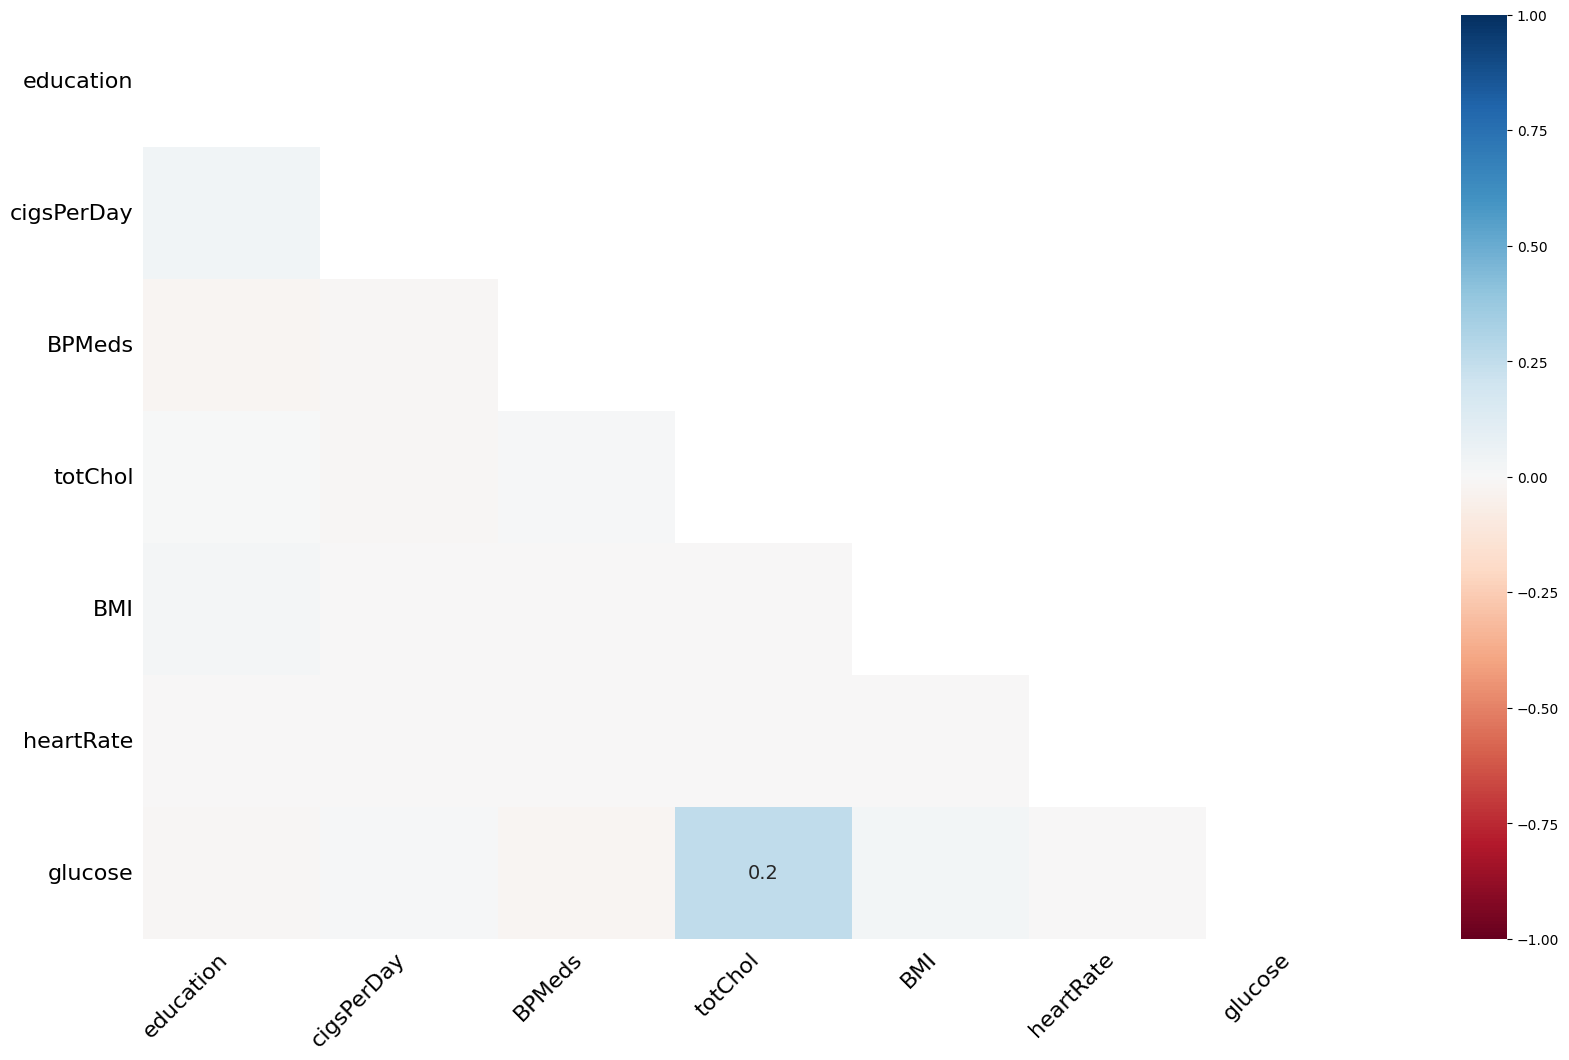

In [ ]:
import missingno as msno
msno.heatmap(df)
plt.show()

In [ ]:
#df = df.drop(['glucose'], axis=1)

In [ ]:
df.shape

(3390, 16)

In [ ]:
df['education']= df['education'].fillna(df['education'].max())
df['cigsPerDay']= df['cigsPerDay'].fillna(df['cigsPerDay'].mean())
df['BPMeds']= df['BPMeds'].fillna(df['BPMeds'].min())
df['totChol']= df['totChol'].fillna(df['totChol'].mean())
df['BMI']= df['BMI'].fillna(df['BMI'].mean())
df['glucose']= df['glucose'].fillna(df['glucose'].mean())


In [ ]:
df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          1
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [ ]:
df.duplicated().sum()

0

### DATA TRANSFORMATON

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3389 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3389 non-null   int64  
 1   education        3389 non-null   float64
 2   sex              3389 non-null   object 
 3   is_smoking       3389 non-null   object 
 4   cigsPerDay       3389 non-null   float64
 5   BPMeds           3389 non-null   float64
 6   prevalentStroke  3389 non-null   int64  
 7   prevalentHyp     3389 non-null   int64  
 8   diabetes         3389 non-null   int64  
 9   totChol          3389 non-null   float64
 10  sysBP            3389 non-null   float64
 11  diaBP            3389 non-null   float64
 12  BMI              3389 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3389 non-null   float64
 15  TenYearCHD       3389 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.1+ KB


In [ ]:
df['sex'].value_counts(normalize=True)

F    0.567424
M    0.432576
Name: sex, dtype: float64

In [ ]:
df['sex']=df['sex'].replace(['F', 'M'], [1, 2 ])

<ipython-input-20-2371c0afd8c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex']=df['sex'].replace(['F', 'M'], [1, 2 ])


In [ ]:
df['is_smoking']=df['is_smoking'].replace(['YES', 'NO'], [1, 0 ])

<ipython-input-21-eb03c60e9dd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_smoking']=df['is_smoking'].replace(['YES', 'NO'], [1, 0 ])


In [ ]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,36,4.0,2,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50,1.0,2,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [ ]:
df['age'].min()


32

In [ ]:
df['age'].max()

70

In [ ]:
age_ranges = [(30, 40), (41, 50,), (51,60),(61,70)]

# Create a new column 'age_group' to store the age group for each row
df['age_group'] = pd.cut(df['age'], bins=[range[0] for range in age_ranges] + [age_ranges[-1][-1]], labels=[f'{range[0]}-{range[1]}' for range in age_ranges])

# Print the subgroups
for age_group, group_df in df.groupby('age_group'):
    print(f"Age Group: {age_group}")
    print(group_df)
    print("\n")

Age Group: 30-40
      age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
1      36        4.0    2           0    0.000000     0.0                0   
7      36        4.0    2           1   35.000000     0.0                0   
8      41        2.0    1           1   20.000000     0.0                0   
21     38        2.0    1           0    0.000000     0.0                0   
22     38        1.0    1           1   30.000000     0.0                0   
...   ...        ...  ...         ...         ...     ...              ...   
3356   38        3.0    1           0    0.000000     0.0                0   
3368   40        4.0    2           1   25.000000     0.0                0   
3377   37        1.0    2           1   25.000000     0.0                0   
3378   39        3.0    1           1    9.069477     0.0                0   
3379   39        1.0    2           1   30.000000     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  

In [ ]:
df['age_group'].head()

0    61-70
1    30-40
2    41-50
3    41-50
4    61-70
Name: age_group, dtype: category
Categories (4, object): ['30-40' < '41-50' < '51-60' < '61-70']

<Axes: >

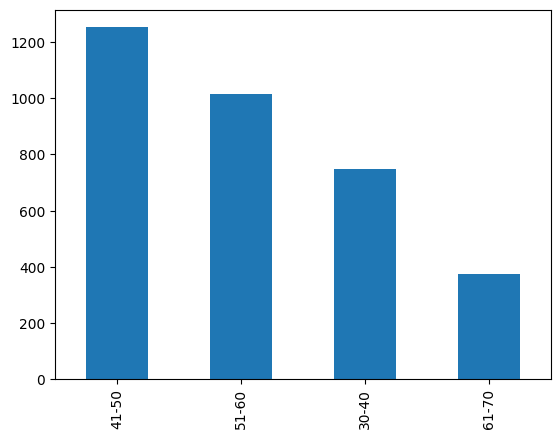

In [ ]:
df['age_group'].value_counts().plot(kind='bar')

In [ ]:
df['TenYearCHD'].value_counts(normalize=True)


0    0.849513
1    0.150487
Name: TenYearCHD, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

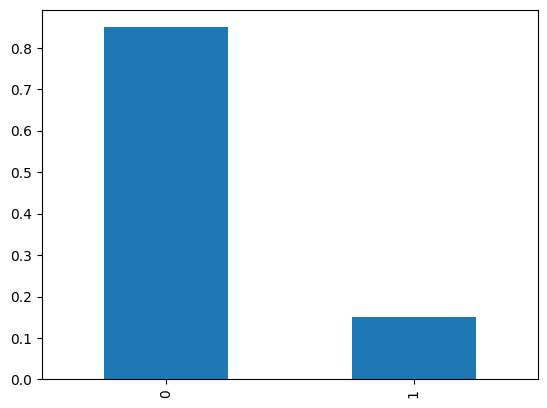

In [ ]:
df['TenYearCHD'].value_counts(normalize=True).plot(kind='bar')
plt.show

<Axes: xlabel='sex'>

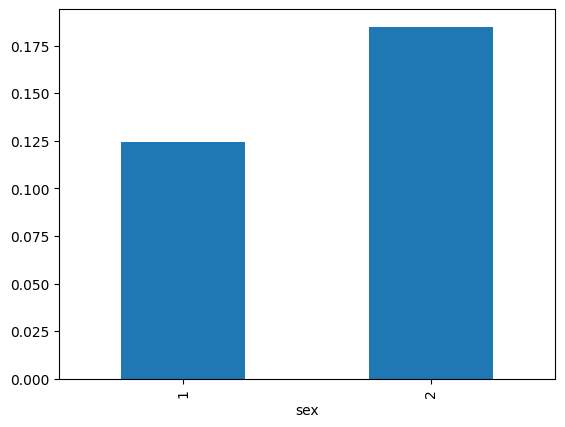

In [ ]:
df.groupby('sex')['TenYearCHD'].mean().plot(kind='bar')

1 = female and 2 = male

In [ ]:
df['sex_cat'] = df['sex'].replace([1, 2], ['female', 'male'])

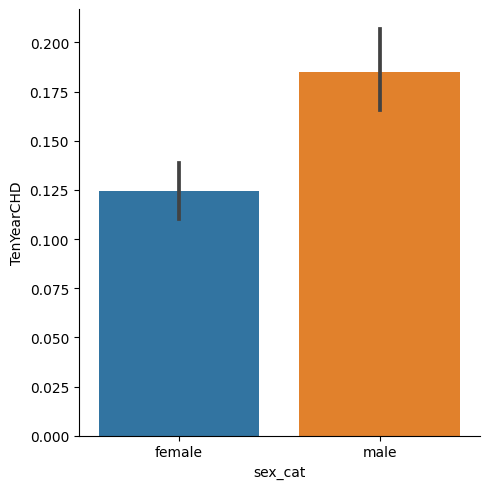

In [ ]:
sns.catplot(data= df, y='TenYearCHD', x='sex_cat', kind= 'bar')
plt.show()

In [ ]:
dependent_var = ['Ten']
categorical_var = [i for i in df.columns if df[i].nunique()<=4]
continuous_var = [i for i in df.columns if i not in categorical_var]

In [ ]:
categorical_var

['education',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD',
 'age_group',
 'sex_cat']

In [ ]:
continuous_var

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [ ]:
df_cat = df[categorical_var]
df_cat

,education,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,age_group,sex_cat
0,2.0,1,1,0.0,0,0,0,1,61-70,female
1,4.0,2,0,0.0,0,1,0,0,30-40,male
2,1.0,1,1,0.0,0,0,0,0,41-50,female
3,1.0,2,1,0.0,0,1,0,1,41-50,male
4,1.0,1,1,0.0,0,0,0,0,61-70,female
...,...,...,...,...,...,...,...,...,...,...
3385,1.0,1,0,0.0,0,0,0,0,51-60,female
3386,1.0,1,0,0.0,0,0,0,0,41-50,female
3387,3.0,2,1,0.0,0,1,0,1,41-50,male
3388,1.0,2,0,0.0,0,1,0,0,51-60,male


<Axes: xlabel='age_group', ylabel='count'>

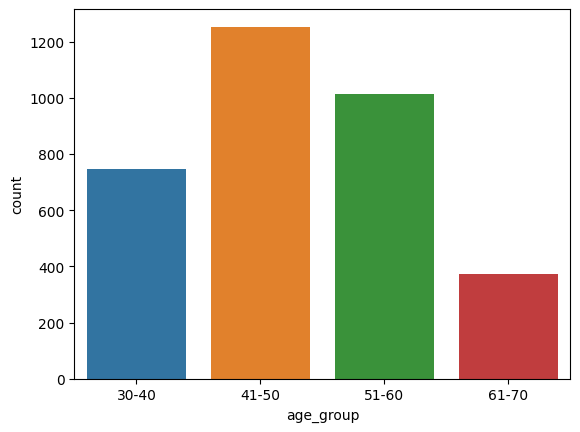

In [ ]:
sns.countplot(data=df_cat, x = 'age_group')

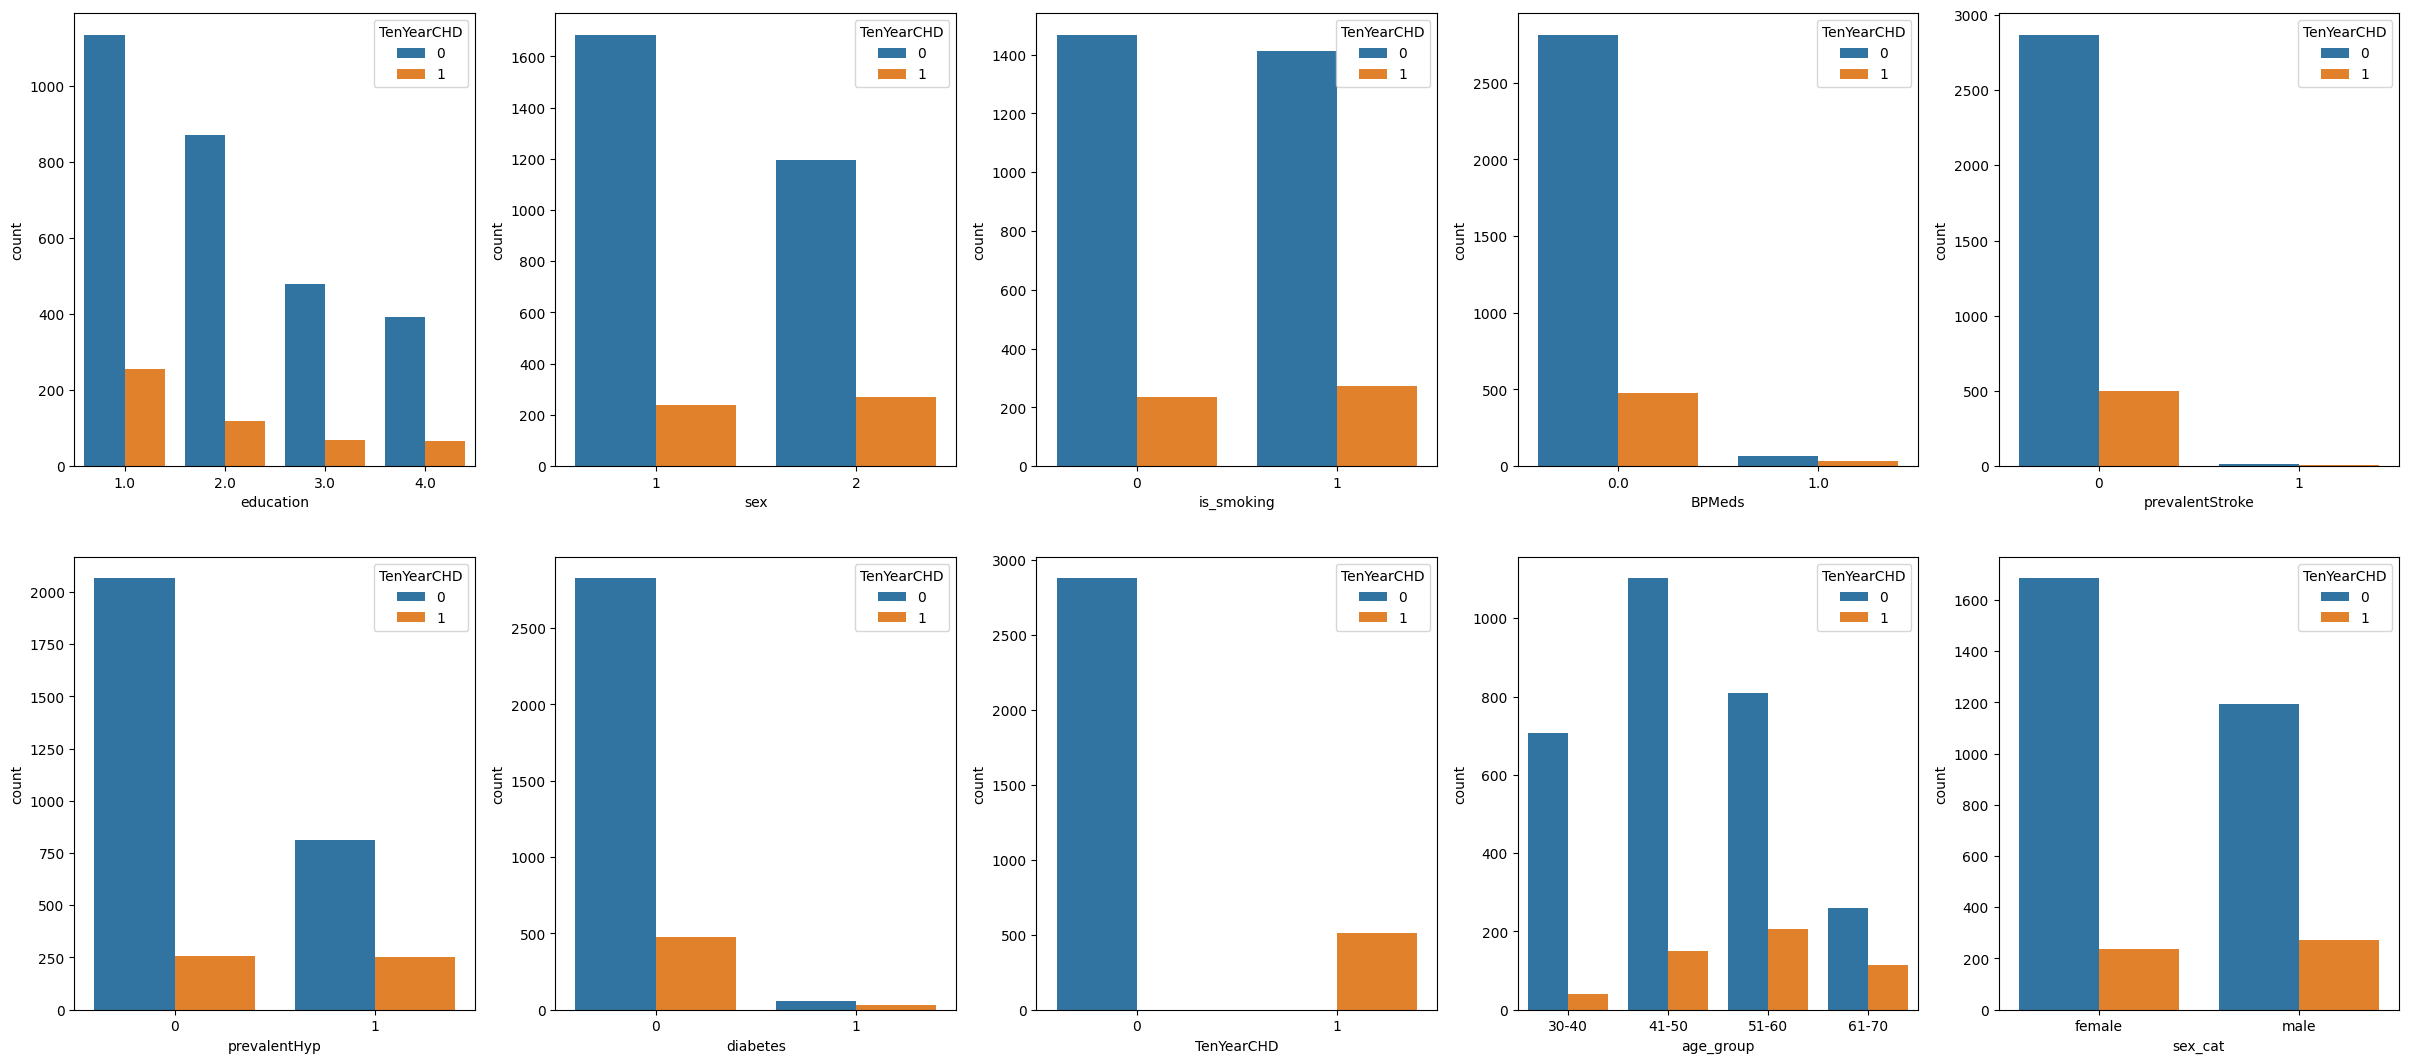

In [ ]:
plt.figure(figsize=(30,20))
for i in enumerate(df_cat.columns):
  plt.subplot(3, 5, i[0]+1)
  sns.countplot(x=i[1], hue='TenYearCHD', data=df_cat)

In [ ]:
df_cont = df[continuous_var]
df_cont

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,64,3.0,221.0,148.0,85.0,25.794964,90.0,80.0
1,36,0.0,212.0,168.0,98.0,29.770000,72.0,75.0
2,46,10.0,250.0,116.0,71.0,20.350000,88.0,94.0
3,50,20.0,233.0,158.0,88.0,28.260000,68.0,94.0
4,64,30.0,241.0,136.5,85.0,26.420000,70.0,77.0
...,...,...,...,...,...,...,...,...
3385,60,0.0,261.0,123.5,79.0,29.280000,70.0,103.0
3386,46,0.0,199.0,102.0,56.0,21.960000,80.0,84.0
3387,44,3.0,352.0,164.0,119.0,28.920000,73.0,72.0
3388,60,0.0,191.0,167.0,105.0,23.010000,80.0,85.0


In [ ]:
df_cont.corr()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
age,1.000000,-0.192427,0.272529,0.404316,0.222328,0.137295,-0.002596,0.111098
cigsPerDay,-0.192427,1.000000,-0.024338,-0.101000,-0.068415,-0.100921,0.066520,-0.065645
totChol,0.272529,-0.024338,1.000000,0.198244,0.153761,0.113536,0.087079,0.060340
sysBP,0.404316,-0.101000,0.198244,1.000000,0.782674,0.331689,0.178262,0.136884
diaBP,0.222328,-0.068415,0.153761,0.782674,1.000000,0.379891,0.174904,0.068570
BMI,0.137295,-0.100921,0.113536,0.331689,0.379891,1.000000,0.069546,0.087854
heartRate,-0.002596,0.066520,0.087079,0.178262,0.174904,0.069546,1.000000,0.083708
glucose,0.111098,-0.065645,0.060340,0.136884,0.068570,0.087854,0.083708,1.000000


<Axes: >

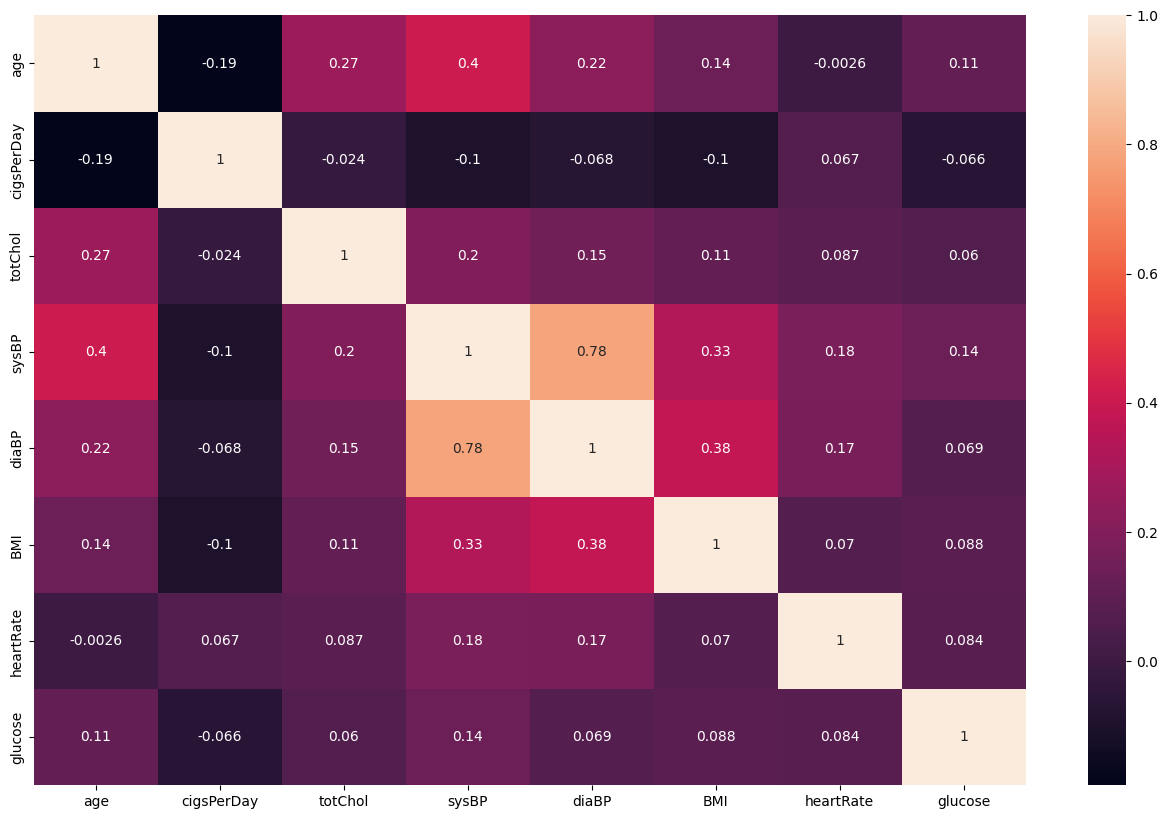

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(df_cont.corr(), annot=True)

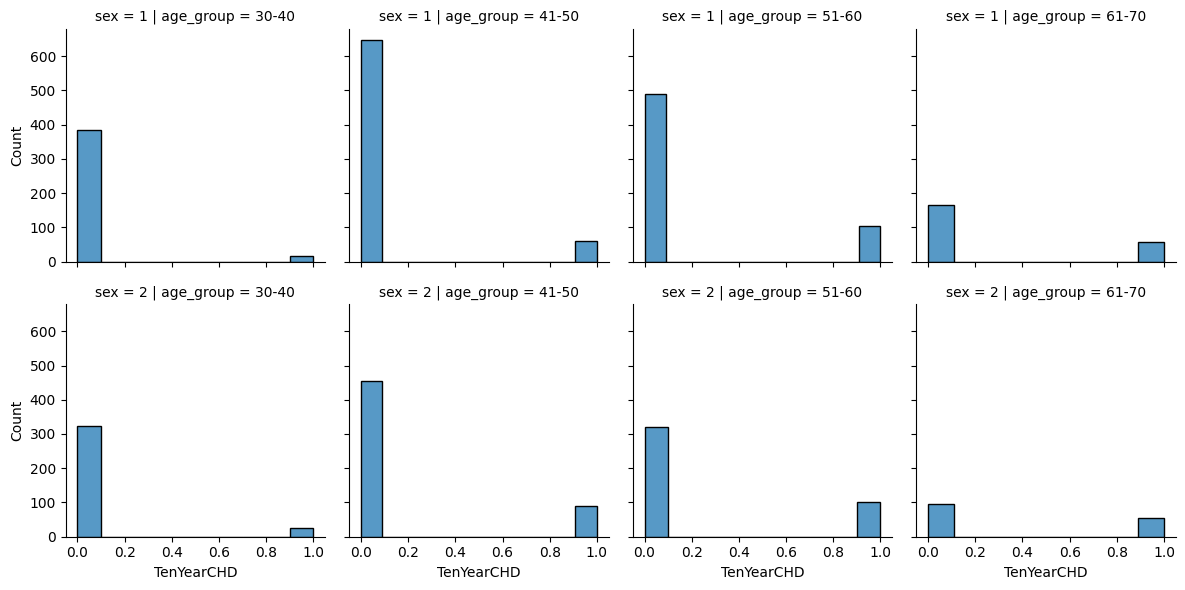

In [ ]:
g = sns.FacetGrid(df, row='sex', col='age_group')
g.map(sns.histplot, "TenYearCHD")
plt.show()

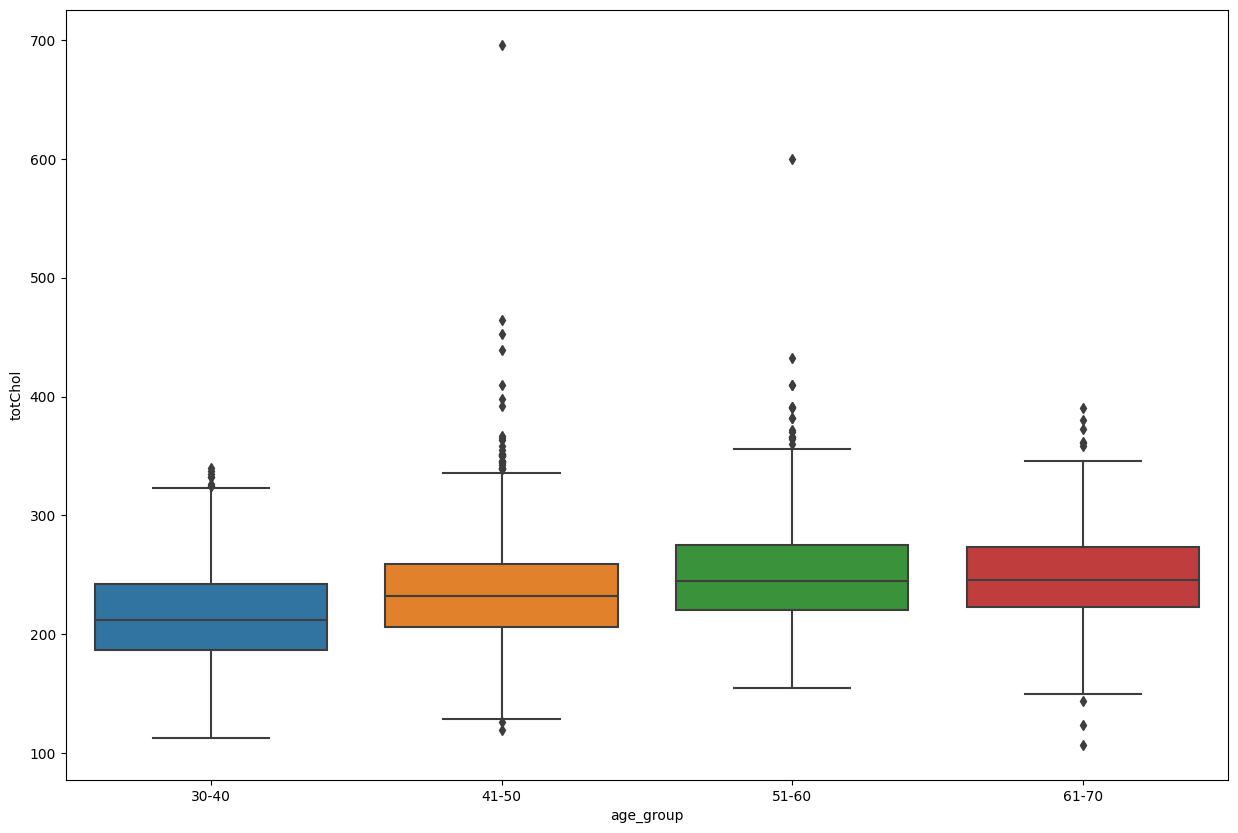

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, x="age_group", y="totChol", ax=ax)
plt.show()

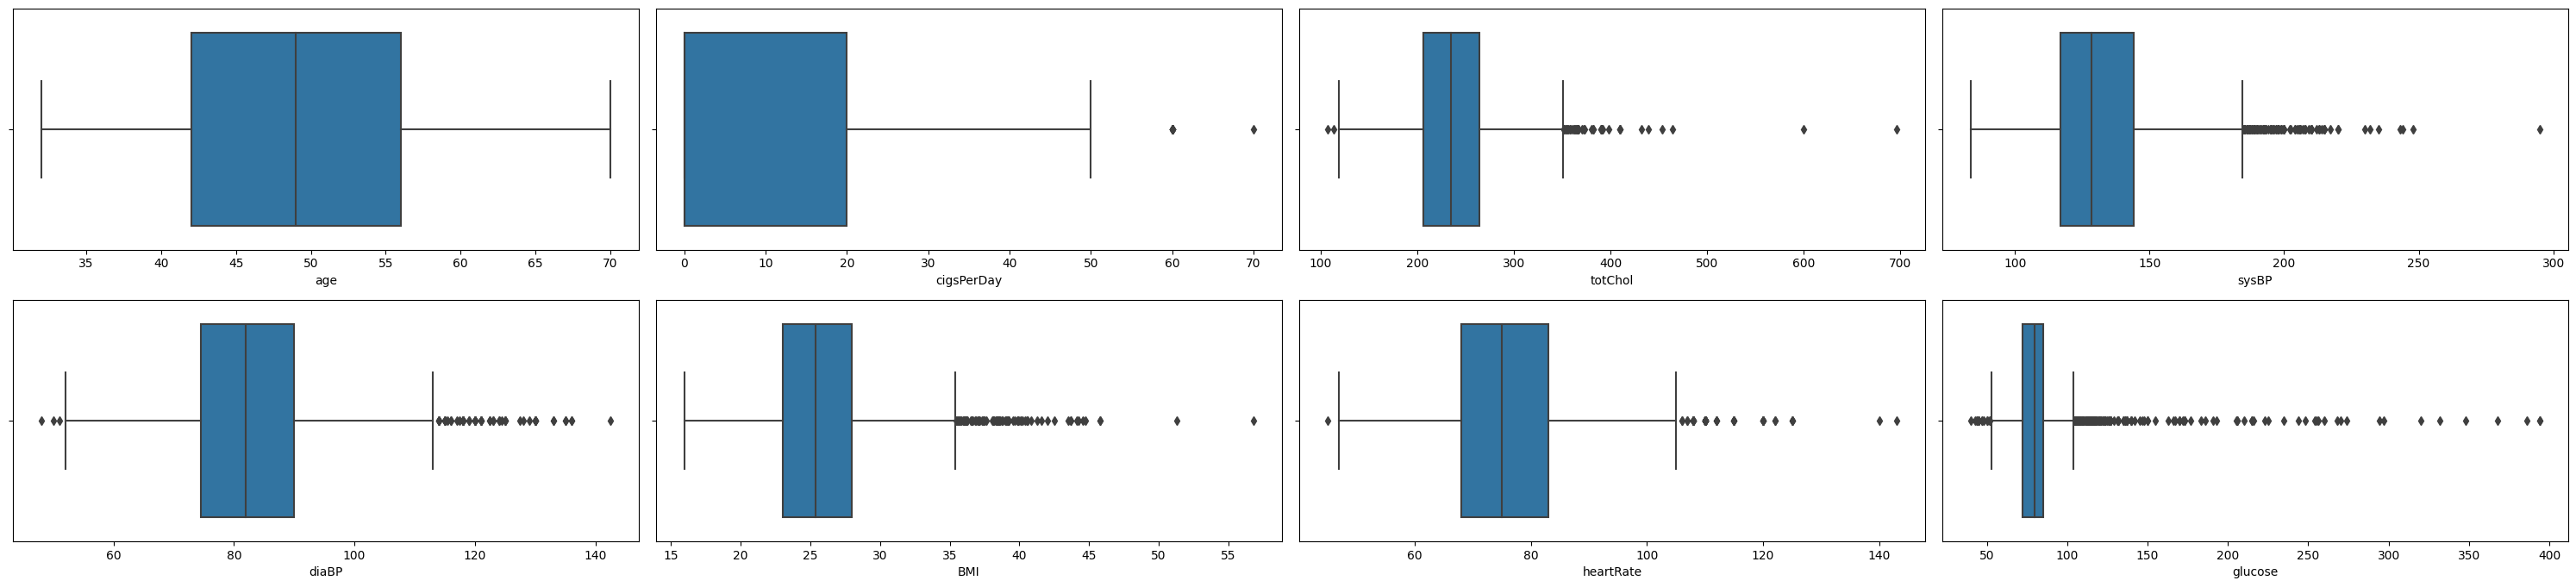

In [ ]:
plt.figure(figsize=(30,20))
for i in enumerate(df_cont.columns):
  plt.subplot(6, 4, i[0]+1)
  sns.boxplot(x=i[1], data=df_cont)
plt.tight_layout()

### **ML**

In [ ]:
df['TenYearCHD'].value_counts(normalize=True)

0    0.849513
1    0.150487
Name: TenYearCHD, dtype: float64

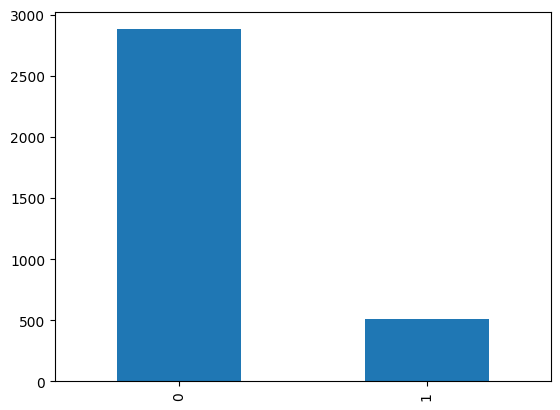

In [ ]:
df['TenYearCHD'].value_counts().plot(kind='bar')
plt.show()

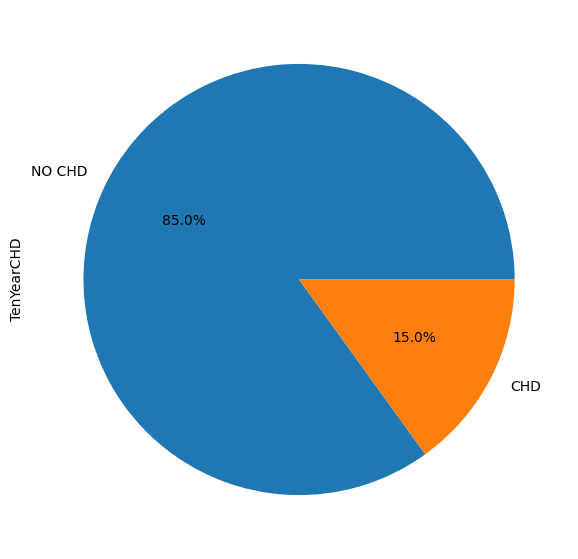

In [ ]:
plt.figure(figsize=(10,7))
df['TenYearCHD'].value_counts().plot(kind='pie', autopct= '%1.1f%%', labels=['NO CHD', 'CHD'])
plt.show()

### 1st split

In [ ]:
X= np.asarray(df_cont)
X.shape

(3389, 8)

In [ ]:
y = np.asarray(df['TenYearCHD'])
y.shape

(3389,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## training model

In [ ]:
def model_evaluation(classifier):
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    #colors = ['green', 'green','blue', 'blue']
    sns.heatmap(data=[[1, 0], [0, 1]],annot = labels,cmap=sns.cubehelix_palette(as_cmap=True),fmt ='', cbar = False)

### LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(solver='liblinear')

In [ ]:
classifier_lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred_lr = classifier_lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)
accuracy_score(y_test, y_pred_lr)

[[569   3]
 [100   6]]


0.8480825958702065

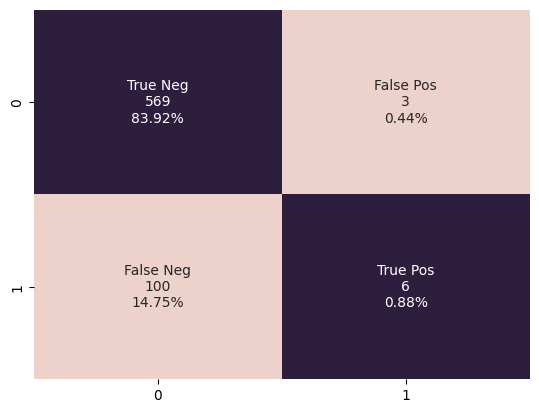

In [ ]:
model_evaluation(classifier_lr)

### RANDOM FOREST CLASSIFICATION

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred_rf = classifier_rf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)
accuracy_score(y_test, y_pred_rf)

[[566   6]
 [ 97   9]]


0.8480825958702065

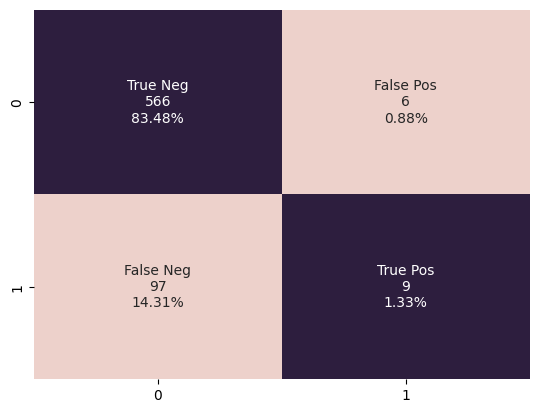

In [ ]:
model_evaluation(classifier_rf)

### SVC

In [ ]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear', random_state = 0)
classifier_svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred_svc = classifier_svc.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred_svc)
print(cm)
accuracy_score(y_test, y_pred_svc)

[[572   0]
 [106   0]]


0.8436578171091446

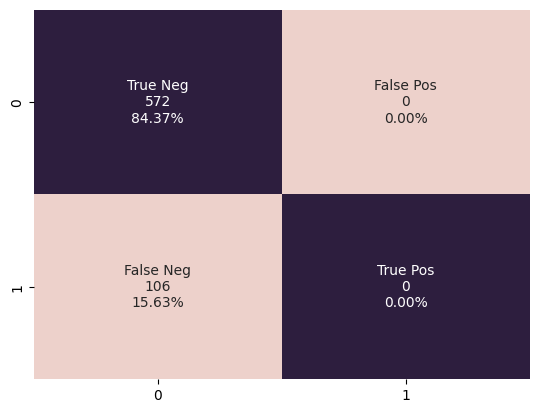

In [ ]:
model_evaluation(classifier_svc)

### DECISION TREE CLASSIFICATION

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred_dt = classifier_dt.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)
accuracy_score(y_test, y_pred_dt)

[[495  77]
 [ 83  23]]


0.7640117994100295

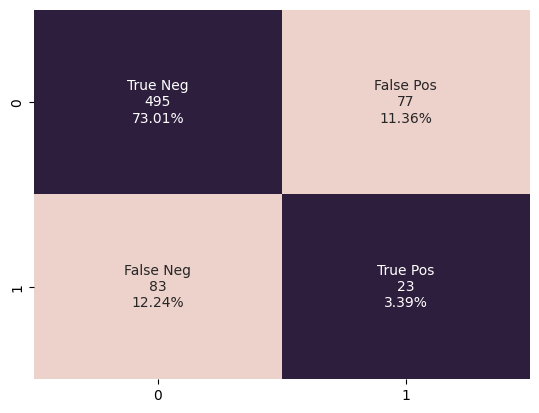

In [ ]:
model_evaluation(classifier_dt)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = classifier_knn.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)
accuracy_score(y_test, y_pred_knn)

[[558  14]
 [ 96  10]]


0.8377581120943953

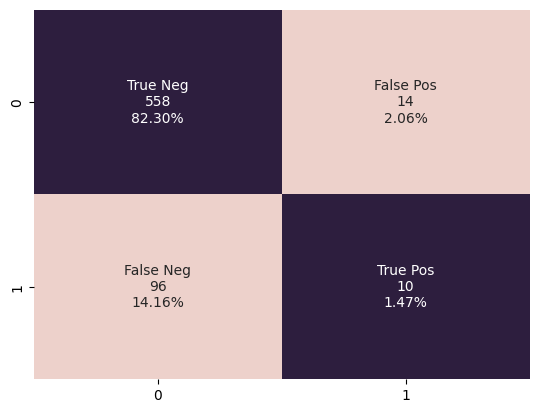

In [ ]:
model_evaluation(classifier_knn)

XGB

In [ ]:
import xgboost as xgb

In [ ]:
classifier_xgb = xgb.XGBClassifier()
classifier_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred_xgb = classifier_xgb.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)
accuracy_score(y_test, y_pred_xgb)

[[551  21]
 [ 88  18]]


0.8392330383480826

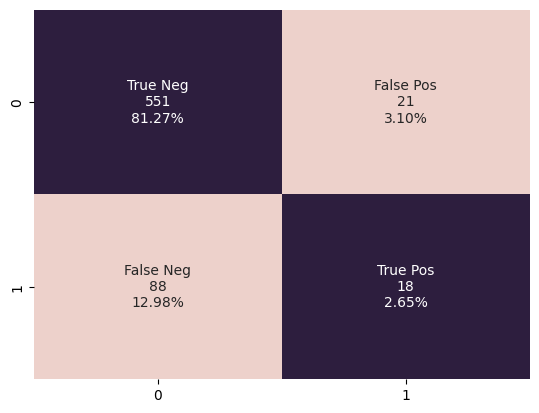

In [ ]:
model_evaluation(classifier_xgb)

### COMPARING THE ACCURACIES OF THE USED MODELS

In [ ]:
lr_accuracy = accuracy_score(y_test, y_pred_lr)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
svc_accuracy = accuracy_score(y_test, y_pred_svc)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

In [ ]:
print("Logistic Regression Accuracy:   ", lr_accuracy)
print("Random Forest Accuracy:         ", rf_accuracy)
print("Support Vector Machine Accuracy:", svc_accuracy)
print("decision tree Accuracy:         ", dt_accuracy)
print("K nearest neighbour Accuracy:   ", knn_accuracy)

Logistic Regression Accuracy:    0.8480825958702065
Random Forest Accuracy:          0.8480825958702065
Support Vector Machine Accuracy: 0.8436578171091446
decision tree Accuracy:          0.7640117994100295
K nearest neighbour Accuracy:    0.8377581120943953


Since accuracy of Random Forest is high

We did not handled outliers or normalised data because random forest models do not get affected with these factors.